In [1]:
import pandas,numpy

import scipy,scipy.stats

import matplotlib,matplotlib.pyplot
matplotlib.rcParams.update({'font.size':40,'font.family':'Arial','xtick.labelsize':20,'ytick.labelsize':20,'axes.labelsize':33})
matplotlib.rcParams['pdf.fonttype']=42

# 0. user defined variables

In [2]:
transcripts_data_file='/Volumes/omics4tb/alomana/projects/TLR/data/DESeq2/normalizedCounts.trna.csv'
footprints_data_file='/Volumes/omics4tb/alomana/projects/TLR/data/DESeq2/normalizedCounts.rbf.csv'

# 1. read data

In [3]:
dfa=pandas.read_csv(transcripts_data_file)
dfa.set_index('Unnamed: 0',inplace=True)
dfa.rename_axis('geneID',inplace=True)
print(dfa.shape)
dfa.head()

(2371, 12)


,trna.rep.1.tp.1,trna.rep.1.tp.2,trna.rep.1.tp.3,trna.rep.1.tp.4,trna.rep.2.tp.1,trna.rep.2.tp.2,trna.rep.2.tp.3,trna.rep.2.tp.4,trna.rep.3.tp.1,trna.rep.3.tp.2,trna.rep.3.tp.3,trna.rep.3.tp.4
geneID,,,,,,,,,,,,
gene-VNG_RS00005,18.908091,19.348712,19.232525,20.380208,18.938371,19.091152,19.876300,20.364131,19.156748,19.270215,20.030011,20.074433
gene-VNG_RS00010,12.577726,13.632958,14.231019,13.946876,12.721514,13.538917,14.289469,13.752900,12.469030,13.376768,14.419380,13.430681
gene-VNG_RS00015,11.125430,12.431311,12.426860,12.711125,11.151036,12.021155,13.359287,12.573962,11.085732,12.089033,13.079664,12.151285
gene-VNG_RS00020,11.503600,13.007351,13.206630,13.518170,11.582232,12.670860,13.988871,13.358040,11.625355,12.700412,13.743723,12.994782
gene-VNG_RS00025,11.658570,11.967482,11.053223,11.007777,11.612381,11.674338,11.665724,11.088320,11.507828,11.847327,11.414751,10.726692


In [4]:
dfb=pandas.read_csv(footprints_data_file)
dfb.set_index('Unnamed: 0',inplace=True)
dfb.rename_axis('geneID',inplace=True)
print(dfb.shape)
dfb.head()

(2331, 12)


,rbf.rep.1.tp.1,rbf.rep.1.tp.2,rbf.rep.1.tp.3,rbf.rep.1.tp.4,rbf.rep.2.tp.1,rbf.rep.2.tp.2,rbf.rep.2.tp.3,rbf.rep.2.tp.4,rbf.rep.3.tp.1,rbf.rep.3.tp.2,rbf.rep.3.tp.3,rbf.rep.3.tp.4
geneID,,,,,,,,,,,,
gene-VNG_RS00005,10.811266,10.920911,12.168485,13.794528,11.056294,11.394621,11.171158,13.867397,10.919963,10.521812,12.412850,12.757550
gene-VNG_RS00010,7.827787,9.107189,9.983565,9.693348,8.004309,9.118822,10.015582,9.237407,8.033598,8.987881,9.809939,9.094818
gene-VNG_RS00015,7.170129,8.436593,9.048484,8.407894,7.258566,8.411314,9.128567,8.269700,7.420174,8.739695,8.980261,8.503122
gene-VNG_RS00020,6.656778,7.962958,8.400121,8.716360,6.903285,7.800612,8.851039,8.515463,6.952641,8.089160,8.732132,8.489572
gene-VNG_RS00025,8.067147,8.503449,8.134142,7.732634,8.065655,8.540412,8.370340,7.786622,7.937986,8.606267,8.281861,7.598884


In [5]:
dfc=dfa.join(dfb,how='inner')
print(dfc.shape)
dfc.head()

(2331, 24)


,trna.rep.1.tp.1,trna.rep.1.tp.2,trna.rep.1.tp.3,trna.rep.1.tp.4,trna.rep.2.tp.1,trna.rep.2.tp.2,trna.rep.2.tp.3,trna.rep.2.tp.4,trna.rep.3.tp.1,trna.rep.3.tp.2,...,rbf.rep.1.tp.3,rbf.rep.1.tp.4,rbf.rep.2.tp.1,rbf.rep.2.tp.2,rbf.rep.2.tp.3,rbf.rep.2.tp.4,rbf.rep.3.tp.1,rbf.rep.3.tp.2,rbf.rep.3.tp.3,rbf.rep.3.tp.4
geneID,,,,,,,,,,,,,,,,,,,,,
gene-VNG_RS00005,18.908091,19.348712,19.232525,20.380208,18.938371,19.091152,19.876300,20.364131,19.156748,19.270215,...,12.168485,13.794528,11.056294,11.394621,11.171158,13.867397,10.919963,10.521812,12.412850,12.757550
gene-VNG_RS00010,12.577726,13.632958,14.231019,13.946876,12.721514,13.538917,14.289469,13.752900,12.469030,13.376768,...,9.983565,9.693348,8.004309,9.118822,10.015582,9.237407,8.033598,8.987881,9.809939,9.094818
gene-VNG_RS00015,11.125430,12.431311,12.426860,12.711125,11.151036,12.021155,13.359287,12.573962,11.085732,12.089033,...,9.048484,8.407894,7.258566,8.411314,9.128567,8.269700,7.420174,8.739695,8.980261,8.503122
gene-VNG_RS00020,11.503600,13.007351,13.206630,13.518170,11.582232,12.670860,13.988871,13.358040,11.625355,12.700412,...,8.400121,8.716360,6.903285,7.800612,8.851039,8.515463,6.952641,8.089160,8.732132,8.489572
gene-VNG_RS00025,11.658570,11.967482,11.053223,11.007777,11.612381,11.674338,11.665724,11.088320,11.507828,11.847327,...,8.134142,7.732634,8.065655,8.540412,8.370340,7.786622,7.937986,8.606267,8.281861,7.598884


# 2. manipulate data

In [6]:
dfc['transcript.tp1.average']=dfc.loc[:,['trna.rep.1.tp.1','trna.rep.2.tp.1','trna.rep.3.tp.1']].mean(axis=1)
dfc['transcript.tp2.average']=dfc.loc[:,['trna.rep.1.tp.2','trna.rep.2.tp.2','trna.rep.3.tp.2']].mean(axis=1)
dfc['transcript.tp3.average']=dfc.loc[:,['trna.rep.1.tp.3','trna.rep.2.tp.3','trna.rep.3.tp.3']].mean(axis=1)
dfc['transcript.tp4.average']=dfc.loc[:,['trna.rep.1.tp.4','trna.rep.2.tp.4','trna.rep.3.tp.4']].mean(axis=1)

In [7]:
dfc['footprint.tp1.average']=dfc.loc[:,['rbf.rep.1.tp.1','rbf.rep.2.tp.1','rbf.rep.3.tp.1']].mean(axis=1)
dfc['footprint.tp2.average']=dfc.loc[:,['rbf.rep.1.tp.2','rbf.rep.2.tp.2','rbf.rep.3.tp.2']].mean(axis=1)
dfc['footprint.tp3.average']=dfc.loc[:,['rbf.rep.1.tp.3','rbf.rep.2.tp.3','rbf.rep.3.tp.3']].mean(axis=1)
dfc['footprint.tp4.average']=dfc.loc[:,['rbf.rep.1.tp.4','rbf.rep.2.tp.4','rbf.rep.3.tp.4']].mean(axis=1)

# 3. biological analysis

In [8]:
a=dfc['footprint.tp1.average']
b=dfc['transcript.tp1.average']
ratio=a-b

In [9]:
print(a.shape,b.shape)

(2331,) (2331,)


-0.27573523152277435 -1.9508903039075198 -0.3990264455796988 8.085103912984393e-90


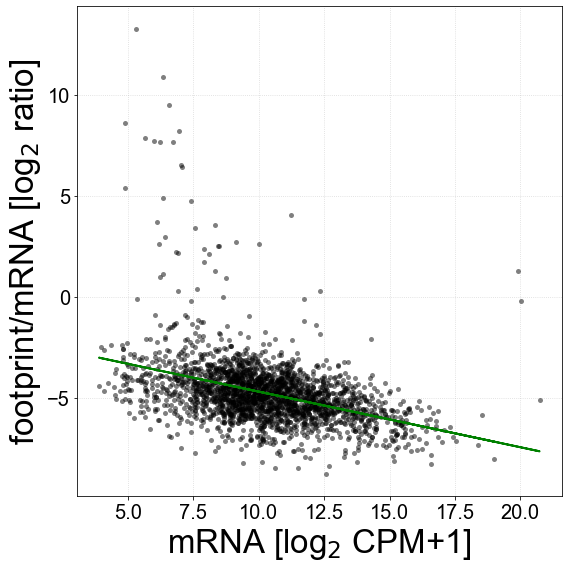

In [12]:
x=numpy.array(b)
y=numpy.array(ratio)

matplotlib.pyplot.figure(None,(8,8))

matplotlib.pyplot.plot(x,y,'o',color='black',alpha=0.5,ms=5,mew=0)

# compute for the model
slope,intercept,r_value,p_value,std_err=scipy.stats.linregress(x,y)
print(slope,intercept,r_value,p_value)
m=slope
c=intercept
expected=list(m*numpy.array(x)+c)
matplotlib.pyplot.plot(x,expected,'-',lw=2,color='green')

matplotlib.pyplot.xlabel('mRNA [log$_{2}$ CPM+1]')
matplotlib.pyplot.ylabel('footprint/mRNA [log$_{2}$ ratio]')

matplotlib.pyplot.grid(True,alpha=0.5,ls=':')
matplotlib.pyplot.tight_layout()